# PhysiCell Data Loader

In [2]:
import pcdl

# Define la ruta base
pathfiles = 'outputs/output_Cess_Finley'

mcds = pcdl.TimeStep(f'{pathfiles}/output00000240.xml')  # loads the whole snapshot: the xml and all related mat and graph files

reading: outputs/output_Cess_Finley/PhysiCell_settings.xml
reading: outputs/output_Cess_Finley/output00000240.xml
working on metadata ...
working on mesh data ...
reading: outputs/output_Cess_Finley/initial_mesh0.mat
working on microenvironment data ...
reading: outputs/output_Cess_Finley/output00000240_microenvironment0.mat
parsing: debris data
parsing: oxygen data
parsing: IFN-gamma data
parsing: IL-4 data
working on discrete cell data ...
Warning @ pyMCDS._read_xml : corrupt outputs/output_Cess_Finley/output00000240_cells.mat detected!
assuming time step with zero cells because of a known bug in PhysiCell MultiCellDS version 0.5 output.
working on graph data ...
reading: outputs/output_Cess_Finley/output00000240_cell_neighbor_graph.txt
reading: outputs/output_Cess_Finley/output00000240_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing outputs/output_Cess_Finley/states_00000240.csv.
done!


In [3]:
sorted(mcds.data['continuum_variables'].keys())  # list of all processed substrates, e.g. oxygen

['IFN-gamma', 'IL-4', 'debris', 'oxygen']

In [4]:
sorted(mcds.data['continuum_variables']['oxygen'].keys())  # substrate related data values, unit, diffusion coefficient, and decay rate

['data', 'decay_rate', 'diffusion_coefficient', 'units']

In [5]:
mcds.get_time()   

7200.0

In [6]:
mcds.get_unit_dict()  # will return a dictionary, which maps the variables to the units specified in the setting.xml.

{'time': 'min',
 'runtime': 'sec',
 'spatial_unit': 'micron',
 'debris': 'dimensionless',
 'debris_diffusion_coefficient': 'micron^2/min',
 'debris_decay_rate': '1/min',
 'oxygen': 'dimensionless',
 'oxygen_diffusion_coefficient': 'micron^2/min',
 'oxygen_decay_rate': '1/min',
 'IFN-gamma': 'dimensionless',
 'IFN-gamma_diffusion_coefficient': 'micron^2/min',
 'IFN-gamma_decay_rate': '1/min',
 'IL-4': 'dimensionless',
 'IL-4_diffusion_coefficient': 'micron^2/min',
 'IL-4_decay_rate': '1/min',
 'position_x': 'microns',
 'position_y': 'microns',
 'position_z': 'microns',
 'total_volume': 'cubic microns',
 'cell_type': 'none',
 'cycle_model': 'none',
 'current_phase': 'none',
 'elapsed_time_in_phase': 'min',
 'nuclear_volume': 'cubic microns',
 'cytoplasmic_volume': 'cubic microns',
 'fluid_fraction': 'none',
 'calcified_fraction': 'none',
 'orientation_x': 'none',
 'orientation_y': 'none',
 'orientation_z': 'none',
 'polarity': 'none',
 'velocity_x': 'micron/min',
 'velocity_y': 'micron/m

In [7]:
# sorted alphabetically
sorted(mcds.get_unit_dict().items())

[('CD8_T_cell_attack_rates', '1/min'),
 ('CD8_T_cell_cell_adhesion_affinities', 'none'),
 ('CD8_T_cell_fusion_rates', '1/min'),
 ('CD8_T_cell_immunogenicities', 'none'),
 ('CD8_T_cell_live_phagocytosis_rates', '1/min'),
 ('CD8_T_cell_transformation_rates', '1/min'),
 ('IFN-gamma', 'dimensionless'),
 ('IFN-gamma_chemotactic_sensitivities', 'none'),
 ('IFN-gamma_decay_rate', '1/min'),
 ('IFN-gamma_diffusion_coefficient', 'micron^2/min'),
 ('IFN-gamma_fraction_released_at_death', 'none'),
 ('IFN-gamma_fraction_transferred_when_ingested', 'none'),
 ('IFN-gamma_internalized_total_substrates', 'stuff'),
 ('IFN-gamma_net_export_rates', 'stuff/min'),
 ('IFN-gamma_saturation_densities', 'stuff/cubic micron'),
 ('IFN-gamma_secretion_rates', '1/min'),
 ('IFN-gamma_uptake_rates', '1/min'),
 ('IL-4', 'dimensionless'),
 ('IL-4_chemotactic_sensitivities', 'none'),
 ('IL-4_decay_rate', '1/min'),
 ('IL-4_diffusion_coefficient', 'micron^2/min'),
 ('IL-4_fraction_released_at_death', 'none'),
 ('IL-4_frac

In [8]:
mcds.get_substrate_list()  # ['oxygen']

['debris', 'oxygen', 'IFN-gamma', 'IL-4']

In [9]:
df = mcds.get_substrate_df()
df.head()

attribute,decay_rate,diffusion_coefficient
substrate,,
debris,0.0,1.0
oxygen,0.0,100000.0
IFN-gamma,0.1,1000.0
IL-4,10.0,1000.0


In [10]:
df_conc = mcds.get_conc_df()
df_conc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   voxel_i        1600 non-null   int64  
 1   voxel_j        1600 non-null   int64  
 2   voxel_k        1600 non-null   int64  
 3   mesh_center_m  1600 non-null   float64
 4   mesh_center_n  1600 non-null   float64
 5   mesh_center_p  1600 non-null   float64
 6   debris         1600 non-null   float64
 7   oxygen         1600 non-null   float64
 8   IFN-gamma      1600 non-null   float64
 9   IL-4           1600 non-null   float64
 10  time           1600 non-null   float64
 11  runtime        1600 non-null   float64
 12  xmlfile        1600 non-null   object 
dtypes: float64(9), int64(3), object(1)
memory usage: 162.6+ KB


In [11]:
# concentration meshgrid for a particular substrate
oxygen_2d = mcds.get_concentration('debris', z_slice=0)
oxygen_2d.shape  # (11, 11)

(40, 40)

Warning @ pyMCDS.plot_contour : could not load outputs/output_Cess_Finleyinitial.svg to auto detect figsizepx. take default.
px figure size set to [640, 480].


/tmp/ipykernel_15519/14784024.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


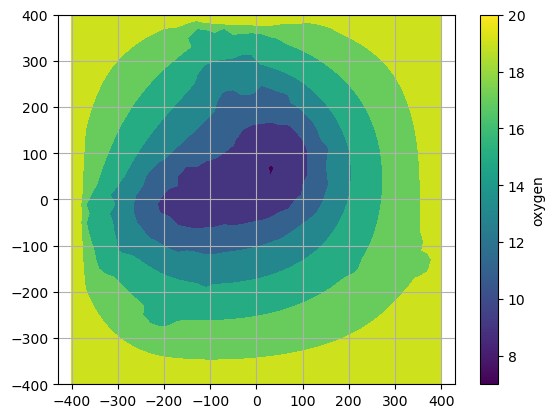

In [12]:
fig = mcds.plot_contour('oxygen')
fig.show()

Warning @ pyMCDS.plot_contour : could not load outputs/output_Cess_Finleyinitial.svg to auto detect figsizepx. take default.
px figure size set to [640, 480].


/tmp/ipykernel_15519/310969408.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


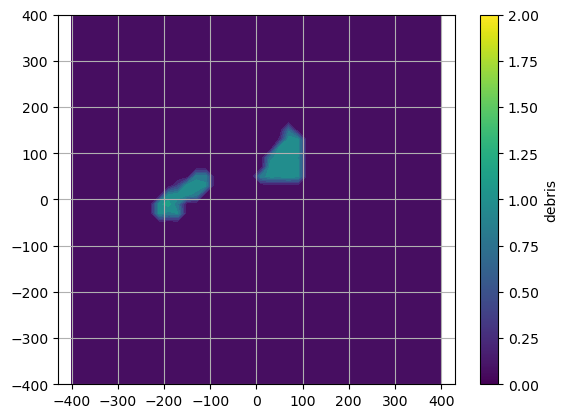

In [13]:
fig = mcds.plot_contour('debris')
fig.show()

Warning @ pyMCDS.plot_contour : could not load outputs/output_Cess_Finleyinitial.svg to auto detect figsizepx. take default.
px figure size set to [640, 480].


/tmp/ipykernel_15519/2745223487.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


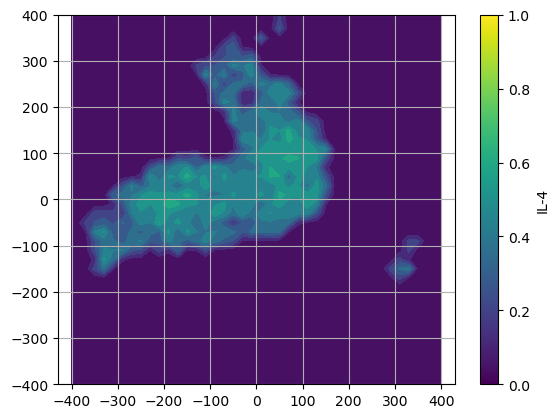

In [14]:
fig = mcds.plot_contour('IL-4')
fig.show()

/tmp/ipykernel_15519/2385789281.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Warning @ pyMCDS.plot_contour : could not load outputs/output_Cess_Finleyinitial.svg to auto detect figsizepx. take default.
px figure size set to [640, 480].


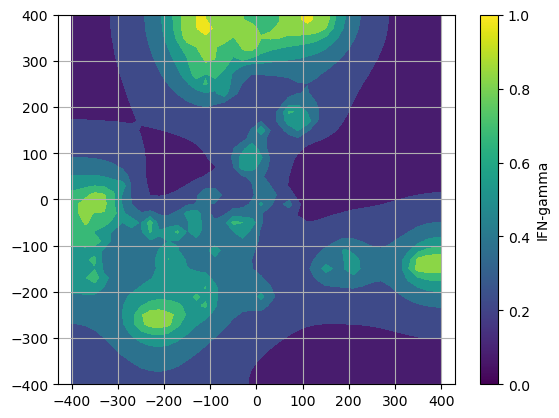

In [15]:
fig = mcds.plot_contour('IFN-gamma')
fig.show()

In [16]:
mcds.get_celltype_dict()  # {'0': 'cancer_cell'}

{'0': 'tumor',
 '1': 'M0_macrophage',
 '2': 'M1_macrophage',
 '3': 'M2_macrophage',
 '4': 'naive_T_cell',
 '5': 'CD8_T_cell',
 '6': 'exhausted_T_cell'}

In [17]:
df_cell = mcds.get_cell_df()
df_cell.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 172 entries, CD8_T_cell_attack_rates to xmlfile
dtypes: bool(3), float64(157), int64(6), object(6)
memory usage: 0.0+ bytes


In [18]:
df_cell.shape[0]  # (992, 95)  this means: 992 agents, 96 tracked variables

0

In [19]:
df_cell = mcds.get_cell_df(values=2)
df_cell.shape # (992, 40) this means: 992 agents, 40 tracked variables

es_delete: {'damage_repair_rate', 'relative_maximum_adhesion_distance', 'attachment_rate', 'debris_internalized_total_substrates', 'cell_cell_adhesion_strength', 'elapsed_time_in_phase', 'oxygen_internalized_total_substrates', 'IL-4_diffusion_coefficient', 'oxygen_fraction_transferred_when_ingested', 'M0_macrophage_live_phagocytosis_rates', 'migration_bias_direction_y', 'migration_speed', 'IL-4', 'naive_T_cell_live_phagocytosis_rates', 'cell_type', 'other_dead_phagocytosis_rate', 'migration_bias_direction_vectorlength', 'exhausted_T_cell_attack_rates', 'attachment_elastic_constant', 'current_death_model', 'orientation_z', 'nuclear_biomass_change_rate', 'M1_macrophage_fusion_rates', 'M0_macrophage_immunogenicities', 'motility_vector_x', 'calcified_fraction', 'M1_macrophage_live_phagocytosis_rates', 'migration_bias_direction_z', 'IL-4_secretion_rates', 'cytoplasmic_volume', 'motility_vector_z', 'debris_fraction_released_at_death', 'IFN-gamma_chemotactic_sensitivities', 'target_solid_nucl

(0, 12)

s set to 71.
px figure size set to [1000, 856].
categories found: set().
min max extrema set to: [None, None].
xlim set to: (-400.0, 400.0).
ylim set to: (-400.0, 400.0).


/tmp/ipykernel_15519/3734710539.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


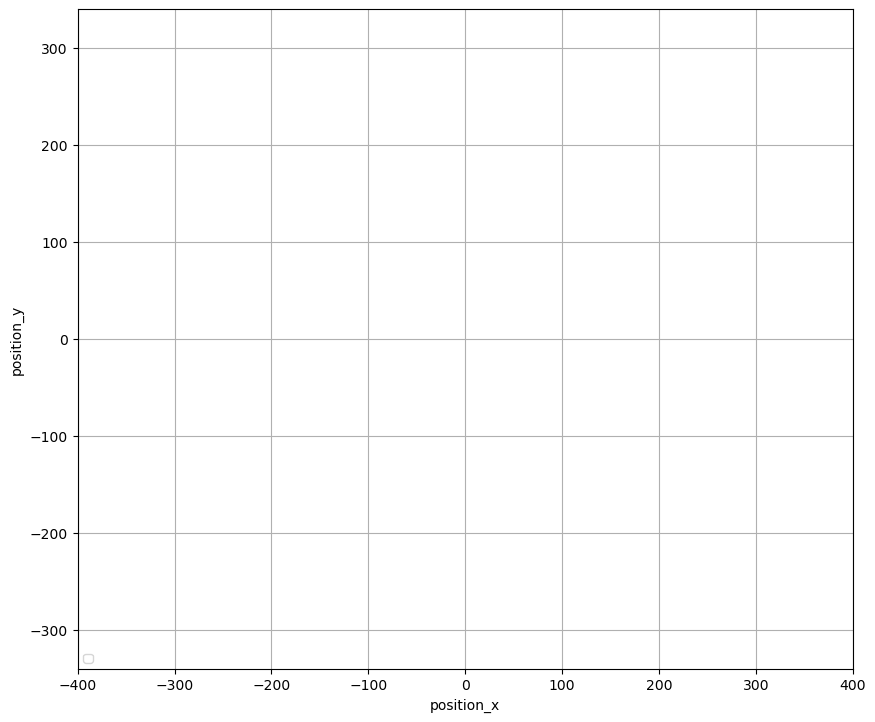

In [20]:
fig = mcds.plot_scatter()
fig.show()

In [84]:
mcds.get_voxel_volume()  # 30[nm] * 20[nm] * 10[nm] = 6000[nm\*\*3]

8000.0

In [21]:
import pandas as pd
import glob
import pcdl

# Define el esquema de colores fijo para cada tipo de célula
colores = {
    "tumor": "#808080",             # Gris
    "M0_macrophage": "#FF0000",     # Rojo
    "M1_macrophage": "#FFFF00",     # Amarillo
    "M2_macrophage": "#008000",     # Verde
    "naive_T_cell": "#0000FF",      # Azul
    "CD8_T_cell": "#FF00FF",        # Rosa
    "exhausted_T_cell": "#FFA500",  # Naranja
    "Total de agentes": "#9467bd",  # Púrpura (opcional para totales)
}

# Define los tipos de células que deben ser considerados
cell_types_to_consider = list(colores.keys())

# Inicia el DataFrame vacío
df_series = None

# Define la ruta de los archivos XML
pathfiles = 'outputs/output_Cess_Finley'

# Obtener todos los archivos XML en el directorio especificado
xml_files = glob.glob(f'{pathfiles}/output*.xml')

# Ordenar los archivos para asegurarse de que se procesen en el orden correcto
xml_files.sort()

# Iterar sobre los archivos XML uno por uno
for xml_file in xml_files:
    try:
        # Crear el objeto TimeStep para procesar el archivo actual
        mcds = pcdl.TimeStep(xml_file)
        
        # Obtener el DataFrame de células
        df_cell = mcds.get_cell_df()
        
        # Filtrar archivos corruptos según el número de filas
        if df_cell.shape[0] == 0 or df_cell.shape[0] > 2000:
            print(f"Archivo corrupto o con exceso de filas: {xml_file}")
            continue
        
        # Filtra solo las filas con los tipos de células que nos interesan
        df_celltype = df_cell.loc[:, ['cell_type', 'time']].copy()
        df_celltype = df_celltype[df_celltype['cell_type'].isin(cell_types_to_consider)]
        
        # Si no hay tipos de células válidos en este archivo, saltamos este archivo
        if df_celltype.empty:
            print(f"Archivo con tipos de células no válidos: {xml_file}")
            continue
        
        # Obtener el conteo por tipo de célula
        s_time = str(list(df_celltype.loc[:, 'time'])[0])  # Obtener el primer valor de 'time' como string
        df_celltype.columns = ['cell_type', s_time]
        df_count = df_celltype.groupby('cell_type').count()
        
        # Acumula los resultados en el DataFrame df_series
        if df_series is None:
            df_series = df_count
        else:
            df_series = pd.merge(df_series, df_count, left_index=True, right_index=True, how='outer')

    except Exception as e:
        print(f"Error procesando el archivo {xml_file}: {e}")

# Agregar la fila 'Total de agentes' como la suma de todas las columnas
df_series.loc['Total de agentes'] = df_series.sum(axis=0)

# Mostrar el DataFrame final
print(df_series)


reading: outputs/output_Cess_Finley/PhysiCell_settings.xml
reading: outputs/output_Cess_Finley/output00000000.xml
working on metadata ...
working on mesh data ...
reading: outputs/output_Cess_Finley/initial_mesh0.mat
working on microenvironment data ...
reading: outputs/output_Cess_Finley/output00000000_microenvironment0.mat
parsing: debris data
parsing: oxygen data
parsing: IFN-gamma data
parsing: IL-4 data
working on discrete cell data ...
reading: outputs/output_Cess_Finley/output00000000_cells.mat
working on graph data ...
reading: outputs/output_Cess_Finley/output00000000_cell_neighbor_graph.txt
reading: outputs/output_Cess_Finley/output00000000_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing outputs/output_Cess_Finley/states_00000000.csv.
done!
reading: outputs/output_Cess_Finley/PhysiCell_settings.xml
reading: outputs/output_Cess_Finley/output00000001.xml
working on metadata ...
working on mesh data ...
reading: outputs/

/home/rodolfo/.local/lib/python3.10/site-packages/scipy/io/matlab/_mio4.py:358: RuntimeWarning: overflow encountered in scalar multiply
  remaining_bytes = hdr.dtype.itemsize * n


parsing: IL-4 data
working on discrete cell data ...
Warning @ pyMCDS._read_xml : corrupt outputs/output_Cess_Finley/output00000016_cells.mat detected!
assuming time step with zero cells because of a known bug in PhysiCell MultiCellDS version 0.5 output.
working on graph data ...
reading: outputs/output_Cess_Finley/output00000016_cell_neighbor_graph.txt
reading: outputs/output_Cess_Finley/output00000016_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing outputs/output_Cess_Finley/states_00000016.csv.
done!
Archivo corrupto o con exceso de filas: outputs/output_Cess_Finley/output00000016.xml
reading: outputs/output_Cess_Finley/PhysiCell_settings.xml
reading: outputs/output_Cess_Finley/output00000017.xml
working on metadata ...
working on mesh data ...
reading: outputs/output_Cess_Finley/initial_mesh0.mat
working on microenvironment data ...
reading: outputs/output_Cess_Finley/output00000017_microenvironment0.mat
parsing: debris dat

/home/rodolfo/.local/lib/python3.10/site-packages/scipy/io/matlab/_mio4.py:358: RuntimeWarning: overflow encountered in scalar multiply
  remaining_bytes = hdr.dtype.itemsize * n


Archivo corrupto o con exceso de filas: outputs/output_Cess_Finley/output00000032.xml
reading: outputs/output_Cess_Finley/PhysiCell_settings.xml
reading: outputs/output_Cess_Finley/output00000033.xml
working on metadata ...
working on mesh data ...
reading: outputs/output_Cess_Finley/initial_mesh0.mat
working on microenvironment data ...
reading: outputs/output_Cess_Finley/output00000033_microenvironment0.mat
parsing: debris data
parsing: oxygen data
parsing: IFN-gamma data
parsing: IL-4 data
working on discrete cell data ...
reading: outputs/output_Cess_Finley/output00000033_cells.mat
working on graph data ...
reading: outputs/output_Cess_Finley/output00000033_cell_neighbor_graph.txt
reading: outputs/output_Cess_Finley/output00000033_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing outputs/output_Cess_Finley/states_00000033.csv.
done!
Archivo corrupto o con exceso de filas: outputs/output_Cess_Finley/output00000033.xml
reading:

/home/rodolfo/.local/lib/python3.10/site-packages/scipy/io/matlab/_mio4.py:358: RuntimeWarning: overflow encountered in scalar multiply
  remaining_bytes = hdr.dtype.itemsize * n


Archivo corrupto o con exceso de filas: outputs/output_Cess_Finley/output00000063.xml
reading: outputs/output_Cess_Finley/PhysiCell_settings.xml
reading: outputs/output_Cess_Finley/output00000064.xml
working on metadata ...
working on mesh data ...
reading: outputs/output_Cess_Finley/initial_mesh0.mat
working on microenvironment data ...
reading: outputs/output_Cess_Finley/output00000064_microenvironment0.mat
parsing: debris data
parsing: oxygen data
parsing: IFN-gamma data
parsing: IL-4 data
working on discrete cell data ...
reading: outputs/output_Cess_Finley/output00000064_cells.mat
working on graph data ...
reading: outputs/output_Cess_Finley/output00000064_cell_neighbor_graph.txt
reading: outputs/output_Cess_Finley/output00000064_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing outputs/output_Cess_Finley/states_00000064.csv.
done!
Archivo corrupto o con exceso de filas: outputs/output_Cess_Finley/output00000064.xml
reading:

/home/rodolfo/.local/lib/python3.10/site-packages/scipy/io/matlab/_mio4.py:358: RuntimeWarning: overflow encountered in scalar multiply
  remaining_bytes = hdr.dtype.itemsize * n


Archivo corrupto o con exceso de filas: outputs/output_Cess_Finley/output00000097.xml
reading: outputs/output_Cess_Finley/PhysiCell_settings.xml
reading: outputs/output_Cess_Finley/output00000098.xml
working on metadata ...
working on mesh data ...
reading: outputs/output_Cess_Finley/initial_mesh0.mat
working on microenvironment data ...
reading: outputs/output_Cess_Finley/output00000098_microenvironment0.mat
parsing: debris data
parsing: oxygen data
parsing: IFN-gamma data
parsing: IL-4 data
working on discrete cell data ...
Warning @ pyMCDS._read_xml : corrupt outputs/output_Cess_Finley/output00000098_cells.mat detected!
assuming time step with zero cells because of a known bug in PhysiCell MultiCellDS version 0.5 output.
working on graph data ...
reading: outputs/output_Cess_Finley/output00000098_cell_neighbor_graph.txt
reading: outputs/output_Cess_Finley/output00000098_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing outputs

/home/rodolfo/.local/lib/python3.10/site-packages/scipy/io/matlab/_mio4.py:358: RuntimeWarning: overflow encountered in scalar multiply
  remaining_bytes = hdr.dtype.itemsize * n


Archivo corrupto o con exceso de filas: outputs/output_Cess_Finley/output00000141.xml
reading: outputs/output_Cess_Finley/PhysiCell_settings.xml
reading: outputs/output_Cess_Finley/output00000142.xml
working on metadata ...
working on mesh data ...
reading: outputs/output_Cess_Finley/initial_mesh0.mat
working on microenvironment data ...
reading: outputs/output_Cess_Finley/output00000142_microenvironment0.mat
parsing: debris data
parsing: oxygen data
parsing: IFN-gamma data
parsing: IL-4 data
working on discrete cell data ...
Warning @ pyMCDS._read_xml : corrupt outputs/output_Cess_Finley/output00000142_cells.mat detected!
assuming time step with zero cells because of a known bug in PhysiCell MultiCellDS version 0.5 output.
working on graph data ...
reading: outputs/output_Cess_Finley/output00000142_cell_neighbor_graph.txt
reading: outputs/output_Cess_Finley/output00000142_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing outputs

/home/rodolfo/.local/lib/python3.10/site-packages/scipy/io/matlab/_mio4.py:358: RuntimeWarning: overflow encountered in scalar multiply
  remaining_bytes = hdr.dtype.itemsize * n
/home/rodolfo/.local/lib/python3.10/site-packages/scipy/io/matlab/_mio4.py:358: RuntimeWarning: overflow encountered in scalar multiply
  remaining_bytes = hdr.dtype.itemsize * n


parsing: IFN-gamma data
parsing: IL-4 data
working on discrete cell data ...
Error procesando el archivo outputs/output_Cess_Finley/output00000188.xml: 
reading: outputs/output_Cess_Finley/PhysiCell_settings.xml
reading: outputs/output_Cess_Finley/output00000189.xml
working on metadata ...
working on mesh data ...
reading: outputs/output_Cess_Finley/initial_mesh0.mat
working on microenvironment data ...
reading: outputs/output_Cess_Finley/output00000189_microenvironment0.mat
parsing: debris data
parsing: oxygen data
parsing: IFN-gamma data
parsing: IL-4 data
working on discrete cell data ...
Warning @ pyMCDS._read_xml : corrupt outputs/output_Cess_Finley/output00000189_cells.mat detected!
assuming time step with zero cells because of a known bug in PhysiCell MultiCellDS version 0.5 output.
working on graph data ...
reading: outputs/output_Cess_Finley/output00000189_cell_neighbor_graph.txt
reading: outputs/output_Cess_Finley/output00000189_attached_cells_graph.txt
working on physiboss d

/home/rodolfo/.local/lib/python3.10/site-packages/pcdl/pyMCDS.py:1439: RuntimeWarning: overflow encountered in square
  a_vectorsq = df_cell.loc[:,s_vector].values**2


Archivo corrupto o con exceso de filas: outputs/output_Cess_Finley/output00000194.xml
reading: outputs/output_Cess_Finley/PhysiCell_settings.xml
reading: outputs/output_Cess_Finley/output00000195.xml
working on metadata ...
working on mesh data ...
reading: outputs/output_Cess_Finley/initial_mesh0.mat
working on microenvironment data ...
reading: outputs/output_Cess_Finley/output00000195_microenvironment0.mat
parsing: debris data
parsing: oxygen data
parsing: IFN-gamma data
parsing: IL-4 data
working on discrete cell data ...
Warning @ pyMCDS._read_xml : corrupt outputs/output_Cess_Finley/output00000195_cells.mat detected!
assuming time step with zero cells because of a known bug in PhysiCell MultiCellDS version 0.5 output.
working on graph data ...
reading: outputs/output_Cess_Finley/output00000195_cell_neighbor_graph.txt
reading: outputs/output_Cess_Finley/output00000195_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing outputs

/home/rodolfo/.local/lib/python3.10/site-packages/scipy/io/matlab/_mio4.py:358: RuntimeWarning: overflow encountered in scalar multiply
  remaining_bytes = hdr.dtype.itemsize * n


Archivo corrupto o con exceso de filas: outputs/output_Cess_Finley/output00000196.xml
reading: outputs/output_Cess_Finley/PhysiCell_settings.xml
reading: outputs/output_Cess_Finley/output00000197.xml
working on metadata ...
working on mesh data ...
reading: outputs/output_Cess_Finley/initial_mesh0.mat
working on microenvironment data ...
reading: outputs/output_Cess_Finley/output00000197_microenvironment0.mat
parsing: debris data
parsing: oxygen data
parsing: IFN-gamma data
parsing: IL-4 data
working on discrete cell data ...
reading: outputs/output_Cess_Finley/output00000197_cells.mat
working on graph data ...
reading: outputs/output_Cess_Finley/output00000197_cell_neighbor_graph.txt
reading: outputs/output_Cess_Finley/output00000197_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing outputs/output_Cess_Finley/states_00000197.csv.
done!


/home/rodolfo/.local/lib/python3.10/site-packages/pcdl/pyMCDS.py:1439: RuntimeWarning: overflow encountered in square
  a_vectorsq = df_cell.loc[:,s_vector].values**2


Archivo corrupto o con exceso de filas: outputs/output_Cess_Finley/output00000197.xml
reading: outputs/output_Cess_Finley/PhysiCell_settings.xml
reading: outputs/output_Cess_Finley/output00000198.xml
working on metadata ...
working on mesh data ...
reading: outputs/output_Cess_Finley/initial_mesh0.mat
working on microenvironment data ...
reading: outputs/output_Cess_Finley/output00000198_microenvironment0.mat
parsing: debris data
parsing: oxygen data
parsing: IFN-gamma data
parsing: IL-4 data
working on discrete cell data ...
Warning @ pyMCDS._read_xml : corrupt outputs/output_Cess_Finley/output00000198_cells.mat detected!
assuming time step with zero cells because of a known bug in PhysiCell MultiCellDS version 0.5 output.
working on graph data ...
reading: outputs/output_Cess_Finley/output00000198_cell_neighbor_graph.txt
reading: outputs/output_Cess_Finley/output00000198_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing outputs

/home/rodolfo/.local/lib/python3.10/site-packages/pcdl/pyMCDS.py:1439: RuntimeWarning: overflow encountered in square
  a_vectorsq = df_cell.loc[:,s_vector].values**2


Archivo corrupto o con exceso de filas: outputs/output_Cess_Finley/output00000209.xml
reading: outputs/output_Cess_Finley/PhysiCell_settings.xml
reading: outputs/output_Cess_Finley/output00000210.xml
working on metadata ...
working on mesh data ...
reading: outputs/output_Cess_Finley/initial_mesh0.mat
working on microenvironment data ...
reading: outputs/output_Cess_Finley/output00000210_microenvironment0.mat
parsing: debris data
parsing: oxygen data
parsing: IFN-gamma data
parsing: IL-4 data
working on discrete cell data ...
Warning @ pyMCDS._read_xml : corrupt outputs/output_Cess_Finley/output00000210_cells.mat detected!
assuming time step with zero cells because of a known bug in PhysiCell MultiCellDS version 0.5 output.
working on graph data ...
reading: outputs/output_Cess_Finley/output00000210_cell_neighbor_graph.txt
reading: outputs/output_Cess_Finley/output00000210_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing outputs

/home/rodolfo/.local/lib/python3.10/site-packages/pcdl/pyMCDS.py:1439: RuntimeWarning: overflow encountered in square
  a_vectorsq = df_cell.loc[:,s_vector].values**2


Archivo corrupto o con exceso de filas: outputs/output_Cess_Finley/output00000215.xml
reading: outputs/output_Cess_Finley/PhysiCell_settings.xml
reading: outputs/output_Cess_Finley/output00000216.xml
working on metadata ...
working on mesh data ...
reading: outputs/output_Cess_Finley/initial_mesh0.mat
working on microenvironment data ...
reading: outputs/output_Cess_Finley/output00000216_microenvironment0.mat
parsing: debris data
parsing: oxygen data
parsing: IFN-gamma data
parsing: IL-4 data
working on discrete cell data ...
Warning @ pyMCDS._read_xml : corrupt outputs/output_Cess_Finley/output00000216_cells.mat detected!
assuming time step with zero cells because of a known bug in PhysiCell MultiCellDS version 0.5 output.
working on graph data ...
reading: outputs/output_Cess_Finley/output00000216_cell_neighbor_graph.txt
reading: outputs/output_Cess_Finley/output00000216_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing outputs

/home/rodolfo/.local/lib/python3.10/site-packages/pcdl/pyMCDS.py:1439: RuntimeWarning: overflow encountered in square
  a_vectorsq = df_cell.loc[:,s_vector].values**2


Archivo corrupto o con exceso de filas: outputs/output_Cess_Finley/output00000220.xml
reading: outputs/output_Cess_Finley/PhysiCell_settings.xml
reading: outputs/output_Cess_Finley/output00000221.xml
working on metadata ...
working on mesh data ...
reading: outputs/output_Cess_Finley/initial_mesh0.mat
working on microenvironment data ...
reading: outputs/output_Cess_Finley/output00000221_microenvironment0.mat
parsing: debris data
parsing: oxygen data
parsing: IFN-gamma data
parsing: IL-4 data
working on discrete cell data ...
reading: outputs/output_Cess_Finley/output00000221_cells.mat
working on graph data ...
reading: outputs/output_Cess_Finley/output00000221_cell_neighbor_graph.txt
reading: outputs/output_Cess_Finley/output00000221_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing outputs/output_Cess_Finley/states_00000221.csv.
done!


/home/rodolfo/.local/lib/python3.10/site-packages/pcdl/pyMCDS.py:1439: RuntimeWarning: overflow encountered in square
  a_vectorsq = df_cell.loc[:,s_vector].values**2
/home/rodolfo/.local/lib/python3.10/site-packages/pcdl/pyMCDS.py:1439: RuntimeWarning: overflow encountered in square
  a_vectorsq = df_cell.loc[:,s_vector].values**2


Archivo corrupto o con exceso de filas: outputs/output_Cess_Finley/output00000221.xml
reading: outputs/output_Cess_Finley/PhysiCell_settings.xml
reading: outputs/output_Cess_Finley/output00000222.xml
working on metadata ...
working on mesh data ...
reading: outputs/output_Cess_Finley/initial_mesh0.mat
working on microenvironment data ...
reading: outputs/output_Cess_Finley/output00000222_microenvironment0.mat
parsing: debris data
parsing: oxygen data
parsing: IFN-gamma data
parsing: IL-4 data
working on discrete cell data ...
Warning @ pyMCDS._read_xml : corrupt outputs/output_Cess_Finley/output00000222_cells.mat detected!
assuming time step with zero cells because of a known bug in PhysiCell MultiCellDS version 0.5 output.
working on graph data ...
reading: outputs/output_Cess_Finley/output00000222_cell_neighbor_graph.txt
reading: outputs/output_Cess_Finley/output00000222_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing outputs

/home/rodolfo/.local/lib/python3.10/site-packages/pcdl/pyMCDS.py:1439: RuntimeWarning: overflow encountered in square
  a_vectorsq = df_cell.loc[:,s_vector].values**2
/home/rodolfo/.local/lib/python3.10/site-packages/pcdl/pyMCDS.py:1439: RuntimeWarning: overflow encountered in square
  a_vectorsq = df_cell.loc[:,s_vector].values**2


Archivo corrupto o con exceso de filas: outputs/output_Cess_Finley/output00000224.xml
reading: outputs/output_Cess_Finley/PhysiCell_settings.xml
reading: outputs/output_Cess_Finley/output00000225.xml
working on metadata ...
working on mesh data ...
reading: outputs/output_Cess_Finley/initial_mesh0.mat
working on microenvironment data ...
reading: outputs/output_Cess_Finley/output00000225_microenvironment0.mat
parsing: debris data
parsing: oxygen data
parsing: IFN-gamma data
parsing: IL-4 data
working on discrete cell data ...
Warning @ pyMCDS._read_xml : corrupt outputs/output_Cess_Finley/output00000225_cells.mat detected!
assuming time step with zero cells because of a known bug in PhysiCell MultiCellDS version 0.5 output.
working on graph data ...
reading: outputs/output_Cess_Finley/output00000225_cell_neighbor_graph.txt
reading: outputs/output_Cess_Finley/output00000225_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing outputs

/home/rodolfo/.local/lib/python3.10/site-packages/pcdl/pyMCDS.py:1439: RuntimeWarning: overflow encountered in square
  a_vectorsq = df_cell.loc[:,s_vector].values**2
/home/rodolfo/.local/lib/python3.10/site-packages/pcdl/pyMCDS.py:1439: RuntimeWarning: overflow encountered in square
  a_vectorsq = df_cell.loc[:,s_vector].values**2


Archivo corrupto o con exceso de filas: outputs/output_Cess_Finley/output00000238.xml
reading: outputs/output_Cess_Finley/PhysiCell_settings.xml
reading: outputs/output_Cess_Finley/output00000239.xml
working on metadata ...
working on mesh data ...
reading: outputs/output_Cess_Finley/initial_mesh0.mat
working on microenvironment data ...
reading: outputs/output_Cess_Finley/output00000239_microenvironment0.mat
parsing: debris data
parsing: oxygen data
parsing: IFN-gamma data
parsing: IL-4 data
working on discrete cell data ...
Warning @ pyMCDS._read_xml : corrupt outputs/output_Cess_Finley/output00000239_cells.mat detected!
assuming time step with zero cells because of a known bug in PhysiCell MultiCellDS version 0.5 output.
working on graph data ...
reading: outputs/output_Cess_Finley/output00000239_cell_neighbor_graph.txt
reading: outputs/output_Cess_Finley/output00000239_attached_cells_graph.txt
working on physiboss data ...
Warning @ pyMCDS._read_xml : physiboss file missing outputs

/home/rodolfo/.local/lib/python3.10/site-packages/scipy/io/matlab/_mio4.py:358: RuntimeWarning: overflow encountered in scalar multiply
  remaining_bytes = hdr.dtype.itemsize * n


In [22]:
# Mostrar el DataFrame final
print(df_series)

                     0.0    30.0    60.0    90.0   120.0   150.0   180.0
cell_type                                                               
CD8_T_cell           NaN     7.0    14.0    22.0    41.0    61.0    72.0
M0_macrophage      200.0   198.0   188.0   166.0   139.0   125.0   103.0
M1_macrophage        NaN     2.0    11.0    25.0    46.0    45.0    55.0
M2_macrophage        NaN     NaN     NaN     7.0    13.0    30.0    43.0
exhausted_T_cell     NaN     NaN     NaN     NaN     1.0     1.0     NaN
naive_T_cell       200.0   194.0   188.0   180.0   161.0   141.0   129.0
tumor             1000.0  1004.0  1004.0  1004.0  1004.0  1004.0  1004.0
Total de agentes  1400.0  1405.0  1405.0  1404.0  1405.0  1407.0  1406.0


In [23]:
df_series

,0.0,30.0,60.0,90.0,120.0,150.0,180.0
cell_type,,,,,,,
CD8_T_cell,NaN,7.0,14.0,22.0,41.0,61.0,72.0
M0_macrophage,200.0,198.0,188.0,166.0,139.0,125.0,103.0
M1_macrophage,NaN,2.0,11.0,25.0,46.0,45.0,55.0
M2_macrophage,NaN,NaN,NaN,7.0,13.0,30.0,43.0
exhausted_T_cell,NaN,NaN,NaN,NaN,1.0,1.0,NaN
naive_T_cell,200.0,194.0,188.0,180.0,161.0,141.0,129.0
tumor,1000.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0
Total de agentes,1400.0,1405.0,1405.0,1404.0,1405.0,1407.0,1406.0
